## Exercises 

For these exercises we will use the [Coimbra Breast Cancer Dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra). This consists of 9 quantitative measures and 1 target value which indicates the presence or not of cancer (1=Healthy, 2=Cancerous).

Please submit these completed exercises as a pdf file.

In [36]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

In [10]:
coimbra = pd.read_csv('dataR2.csv')
coimbra

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [3]:
coimbra.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


### Exercise 1 

Check for missing values, and drop any rows which have missing values. Create a feature and target dataframe and split these into testing and training sets. (2 marks)

In [12]:
coimbra.isna().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

There are no missing values. 

In [16]:
from sklearn.model_selection import train_test_split
X= coimbra.drop('Classification', axis=1)  
y = coimbra['Classification']  
# Split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Exercise 2

Create a simple Random Forest Classification as a baseline model, and calculate the accuracy for this model. (2 marks)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



# Initialize the Random Forest Classifier and fit  the model on the trn data
clf = RandomForestClassifier(n_estimators=200, random_state=42,max_samples=.5).fit(X_train, y_train)

#Predict on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest Classifier: {accuracy:.2f}")



Accuracy of the Random Forest Classifier: 0.88


### Exercise 3

Create a AdaBoost model with a Decision Stump and a learning rate of 1, and calculate the accuracy of this model. (2 marks)

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                            n_estimators=200, learning_rate=1)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)  # calculate the predicted values

In [29]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                            n_estimators=200, learning_rate=.1)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)  # calculate the predicted values
# print the accuracy of the classifier
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Accuracy 0.792


### Exercise 4

For the same learning rate, find the optimal number of estimators. Just use the testing and training sets to calculate this, don't use cross-validation. (4 marks)

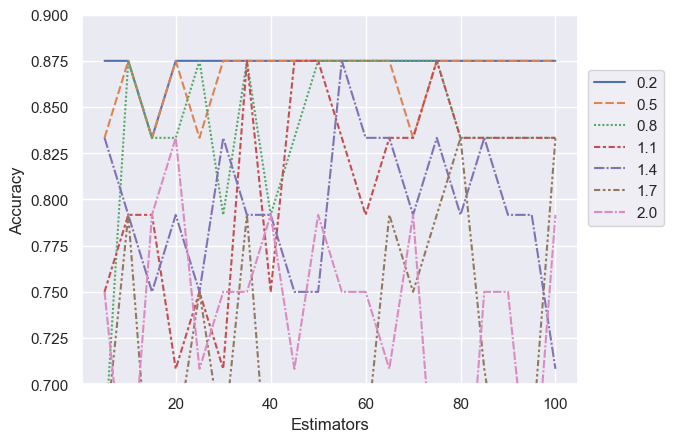

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
lrates = np.arange(0.2, 2.3, 0.3)
nests = np.arange(5, 105, 5)
results = np.zeros((len(nests), len(lrates)))
for i in range(len(lrates)):
    for j in range(len(nests)):
        print(i, j, end='\r')
        ada_clf = GradientBoostingClassifier(n_estimators=nests[j], learning_rate=lrates[i])
        ada_clf.fit(X_train, y_train)
        y_pred = ada_clf.predict(X_test)  # calculate the predicted values
        # evaluate the model and collect the results
        results[j,i] = accuracy_score(y_test, y_pred)

results_df = pd.DataFrame(results, columns=np.round(lrates, 1), index=nests)
results_df

results_df.agg(['idxmax', 'max'], axis=0)

sns.lineplot(data=results_df)
plt.ylim((.7,.9))
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.02, 0.85), loc='upper left', borderaxespad=0)

import matplotlib.pyplot as plt
import seaborn as sns


Optimal estimators: 55
